# Figure 1

Author: Sandra Godinho Silva \
Creation date: 23/09/2020 \
Version: 0.1

In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/home/gomes/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 10)

## Imports

In [4]:
metrics = pd.read_csv("/home/gomes/silva2/1_Dataset_creation/Dataset.csv")
metrics = metrics.rename(columns={"Genome_ID":"Assembly accession"})
metrics.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High
1,GCA_000023285.1,GCA_000023285.1_ASM2328v1_genomic,p__Bacteroidetes (UID2605),100.00,0.00,0.0,100.00,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Capnocytophaga,Capnocytophaga ochracea,1,1,2612925,2612925,0.0,1,2612925,1,2612925,1,2612925,1,2612925,2612925,2612925,1,100.0,0.39588,0.0,High


In [5]:
metadata = pd.read_csv("/home/gomes/silva2/2_Metadata/Metadata_final.csv")
metadata.head(2)

,Assembly accession,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacterium johnsoniae UW101,NaN,NaN,Aerobic,identical,NaN,NaN,NaN,NaN,NaN,2014-01-28T00:00:00.000,NaN,NC_009441,representative genome,5017.0,NaN,assembly from type material,Major,NaN,Non-halophilic,SAMN02598357,CP000685,NaN,2007/05/01,DOE Joint Genome Institute,NaN,NaN,NaN,NaN,complete,NaN,986.0,NaN,No,ATCC 17061,NaN,NaN,Generic,Generic.1.0,US DOE Joint Genome Institute,NaN,NaN,376686.0,NaN,20-30,Mesophilic,NaN,NaN,type strain of Flavobacterium johnsoniae,Yes,NaN,latest,NaN,NaN,NaN,False,Non_marine
1,GCA_000023285.1,ASM2328v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,NaN,PRJNA29403,SAMN00001911,NaN,Generic sample from Capnocytophaga ochracea DS...,NaN,NaN,Rod,NaN,NaN,Capnocytophaga ochracea DSM 7271,2009-04-30T00:00:00Z,NaN,NaN,1.0,NaN,DSM 7271,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
statistics = pd.read_csv("/home/gomes/silva2/3_Annotation/Orf_annotation_Outputs/Statistics.csv")
statistics = statistics.rename(columns={"Unnamed: 0":"Assembly accession"})
statistics.head(2)

,Assembly accession,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
0,GCA_900113805.1,2828,2255,1120,1827,92,79.738331,39.603960,64.603960,3.253182
1,GCA_003449015.1,4360,3432,1629,2761,208,78.715596,37.362385,63.325688,4.770642


In [7]:
statistics.describe()

,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,3199.770235,2476.229019,1231.480045,2000.995151,88.137262,78.038681,39.462142,63.335659,2.657785
std,955.167195,688.751064,291.250417,537.250808,51.364906,4.351197,4.173492,4.446347,1.068118
min,552.000000,178.000000,325.000000,454.000000,8.000000,5.036786,14.633840,26.767994,0.590120
25%,2536.000000,1991.000000,1020.000000,1610.000000,53.000000,75.693756,36.768150,60.596850,1.966439
50%,3172.000000,2489.000000,1257.000000,2012.000000,81.000000,78.421822,39.174389,63.353500,2.434008
75%,3825.000000,2957.000000,1431.000000,2375.000000,108.000000,80.538462,41.563636,65.752186,3.012048
max,7961.000000,4221.000000,1978.000000,3349.000000,316.000000,91.223733,58.876812,82.246377,8.152511


## Merge

In [8]:
dataset = pd.merge(metrics, statistics, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge")
dataset["merge"].value_counts()

both          2680
right_only       0
left_only        0
Name: merge, dtype: int64

In [9]:
dataset = pd.merge(dataset, metadata, how="left", left_on="Assembly accession", right_on="Assembly accession", indicator="merge2")
dataset["merge2"].value_counts()

both          2680
right_only       0
left_only        0
Name: merge2, dtype: int64

In [10]:
dataset.drop(columns=["merge", "merge2"], inplace=True)
dataset.head(2)

,Assembly accession,Bin_Id,Marker lineage,Completeness,Contamination,Strain_heterogeneity,Quality_score,classification,Domain,Phyla,Class,Order,Family,Genus,Species,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,Classification_quality,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,GCA_000016645.1_ASM1664v1_genomic,f__Flavobacteriaceae (UID2817),99.65,0.14,0.0,98.95,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium,Flavobacterium johnsoniae,1,1,6096872,6096872,0.0,1,6096872,1,6096872,1,6096872,1,6096872,6096872,6096872,1,100.0,0.34113,0.0,High,5192,3948,1843,3127,244,76.040062,35.496918,60.227273,4.699538,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [11]:
dataset.to_csv("All_info.csv", index=False)

# Numbers

In [12]:
dataset.describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"]].round(2)

,Completeness,Contamination,Strain_heterogeneity,Quality_score,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,orfs,pfam,ko,cog,cazymes,Orfs_anno_pfam%,Orfs_anno_ko%,Orfs_anno_cog%,Orfs_anno_cazymes%,Contigs,Host taxid,Ncbi taxon ID,Plasmids,Refseq cds,Species taxid
mean,96.06,0.84,9.97,91.84,81.21,105.42,3579242.27,3574865.26,0.16,14.35,953766.02,17.59,877389.92,44.03,732450.88,55.04,676882.60,1176468.28,1095297.83,11.48,78.25,0.36,0.03,3200.31,2476.63,1231.65,2001.29,88.16,78.04,39.46,63.33,2.66,91.58,9606.0,1283290.65,1.26,3127.69,1242010.45
std,8.50,1.18,23.22,11.40,132.31,216.69,1101861.86,1102898.78,0.66,30.11,1430723.65,42.49,1395113.70,90.91,1445229.10,134.16,1408258.08,1364500.60,1334452.79,9.13,31.95,0.04,0.02,954.93,688.56,291.18,537.14,51.36,4.35,4.17,4.45,1.07,144.10,0.0,849892.82,0.65,960.45,907416.18
min,50.31,0.00,0.00,50.01,1.00,1.00,569462.00,569462.00,0.00,1.00,2659.00,1.00,1884.00,1.00,545.00,1.00,518.00,11420.00,9123.00,0.00,0.00,0.28,0.00,552.00,178.00,325.00,454.00,8.00,5.04,14.63,26.77,0.59,1.00,9606.0,102.00,1.00,5.00,102.00
25%,98.35,0.09,0.00,91.32,14.00,17.00,2805386.25,2803262.50,0.00,2.00,84056.00,2.00,76662.00,6.00,21232.50,7.00,19938.00,233317.00,219077.75,2.00,71.36,0.33,0.01,2537.50,1991.75,1020.00,1610.00,53.00,75.69,36.77,60.60,1.97,16.00,9606.0,360293.00,1.00,2528.50,266748.00
50%,99.52,0.49,0.00,96.37,39.00,44.00,3545543.00,3543446.50,0.00,5.00,294681.00,5.00,259833.00,14.00,85478.00,15.00,75395.50,635417.00,579071.00,11.00,94.89,0.35,0.03,3172.00,2490.00,1257.00,2012.00,81.00,78.42,39.17,63.35,2.43,44.00,9606.0,1500283.00,1.00,3041.00,1382466.00
75%,100.00,1.08,0.00,98.75,90.00,101.00,4277908.00,4275901.50,0.02,12.00,822818.75,13.00,680443.50,39.00,235485.25,42.00,188814.00,1483307.50,1222603.25,18.00,99.15,0.37,0.04,3825.00,2957.25,1431.00,2375.50,108.00,80.54,41.56,65.75,3.01,103.00,9606.0,1951810.50,1.00,3713.50,1951803.50
max,100.00,9.68,100.00,100.00,1512.00,5612.00,7041311.00,7041311.00,11.48,418.00,6653812.00,1103.00,6653812.00,1182.00,6653812.00,3546.00,6653812.00,6653812.00,6653812.00,54.00,100.00,0.55,0.17,7961.00,4221.00,1978.00,3349.00,316.00,91.22,58.88,82.25,8.15,1512.00,9606.0,2698827.00,3.00,9339.00,2767188.00


In [13]:
statistics_classification = dataset.groupby("Classification_quality").describe()
statistics_classification2 = statistics_classification.T.round(2)
col = ["High", "Medium", "Low"]
statistics_classification2 = statistics_classification2[col]
statistics_classification = statistics_classification2.loc(axis=0)[:, ["mean", "min", "max"]]
statistics_classification.T

Completeness               Contamination             \
                               mean    min    max          mean  min   max   
Classification_quality                                                       
High                          99.27  90.14  100.0          0.50  0.0  4.16   
Medium                        93.00  80.03  100.0          1.94  0.0  9.56   
Low                           83.06  50.31  100.0          1.67  0.0  9.68   

                       Strain_heterogeneity              Quality_score         \
                                       mean  min     max          mean    min   
Classification_quality                                                          
High                                   0.07  0.0    9.09         96.79  71.57   
Medium                                18.88  0.0   47.22         83.33  50.14   
Low                                   50.51  0.0  100.00         74.71  50.01   

                              n_scaffolds              n_contigs               \
                          max        mean  min     max      mean  min     max   
Classification_quality                                                          
High                    100.0       46.95  1.0   434.0     52.51  1.0   465.0   
Medium                  100.0      170.99  1.0  1512.0    234.77  1.0  1782.0   
Low                      99.2      176.22  1.0  1506.0    259.26  1.0  5612.0   

                           scaf_bp                         contig_bp  \
                              mean        min        max        mean   
Classification_quality                                                 
High                    3799565.31  1378189.0  7005797.0  3797980.32   
Medium                  3492713.44  1043041.0  7041311.0  3483586.28   
Low                     2591461.99   569462.0  7026888.0  2577372.46   

                                             gap_pct             scaf_N50  \
                              min        max    mean  min    max     mean   
Classification_quality                                                      
High                    1378189.0  7005740.0    0.04  0.0   8.13     6.03   
Medium                  1043041.0  7041311.0    0.29  0.0   3.20    30.82   
Low                      569462.0  6570299.0    0.60  0.0  11.48    41.53   

                                      scaf_L50                     ctg_N50  \
                        min    max        mean      min        max    mean   
Classification_quality                                                       
High                    1.0   76.0  1132177.27  12138.0  6363829.0    6.72   
Medium                  1.0  353.0   552414.91   3040.0  6653812.0   39.04   
Low                     1.0  418.0   408224.30   2659.0  5602501.0   53.14   

                                        ctg_L50                     scaf_N90  \
                        min     max        mean      min        max     mean   
Classification_quality                                                         
High                    1.0    80.0  1035665.30  11189.0  6209424.0    18.56   
Medium                  1.0   370.0   522416.73   3040.0  6653812.0    99.87   
Low                     1.0  1103.0   392589.60   1884.0  5602501.0   123.04   

                                      scaf_L90                    ctg_N90  \
                        min     max       mean     min        max    mean   
Classification_quality                                                      
High                    1.0   253.0  867056.02  3054.0  6363829.0   20.88   
Medium                  1.0  1121.0  437655.25   545.0  6653812.0  128.08   
Low                     1.0  1182.0  314708.99  1241.0  5602501.0  162.42   

                                       ctg_L90                       scaf_max  \
                        min     max       mean     min        max        mean   
Classification_quality                                                          
High                    1.0 

In [14]:
dataset["Classification_quality"].value_counts()

High      1957
Low        409
Medium     314
Name: Classification_quality, dtype: int64

In [15]:
dataset["Genus"].describe()

count               2680
unique               175
top       Flavobacterium
freq                 589
Name: Genus, dtype: object

In [16]:
dataset["Species"].describe()

count                             2680
unique                            1158
top       Flavobacterium psychrophilum
freq                               125
Name: Species, dtype: object

In [17]:
dataset["Host resumed"].describe()

count              477
unique             100
top       Homo sapiens
freq               177
Name: Host resumed, dtype: object

In [18]:
dataset["Sequencing platform resumed"].value_counts()

Illumina                            1401
PacBio                               156
Illumina; PacBio                      50
454                                   27
IonTorrent                            15
                                    ... 
Sanger                                 2
ABI 3730; Shimadzu DeNOVA-5500HT       1
Illumina; IonTorrent; 454              1
454; Illumina; Sanger                  1
PacBio; IonTorrent                     1
Name: Sequencing platform resumed, Length: 16, dtype: int64

In [19]:
dataset["Sequencing platform resumed"].describe()

count         1693
unique          16
top       Illumina
freq          1401
Name: Sequencing platform resumed, dtype: object

In [20]:
dataset["Geographic location (country or region)"].describe()

count     1659
unique      97
top        USA
freq       326
Name: Geographic location (country or region), dtype: object

In [21]:
dataset["Family"].value_counts()

Flavobacteriaceae    1923
Weeksellaceae         757
Name: Family, dtype: int64

In [22]:
dataset["MAG"].value_counts()

False    1988
True      692
Name: MAG, dtype: int64

In [23]:
dataset["MAG"].value_counts(normalize=True) * 100

False    74.179104
True     25.820896
Name: MAG, dtype: float64

In [24]:
dataset.groupby("MAG").describe()

Completeness                                                        \
             count       mean        std    min     25%    50%       75%   
MAG                                                                        
False       1988.0  99.363169   1.443353  72.67  99.290  99.65  100.0000   
True         692.0  86.588483  12.370240  50.31  78.905  90.39   97.4225   

             Contamination                                                     \
         max         count      mean       std  min   25%   50%     75%   max   
MAG                                                                             
False  100.0        1988.0  0.583094  0.725286  0.0  0.00  0.42  0.8300  8.97   
True   100.0         692.0  1.594754  1.764115  0.0  0.29  1.07  2.2125  9.68   

      Strain_heterogeneity                                                    \
                     count       mean        std  min  25%  50%   75%    max   
MAG                                                                            
False               1988.0   5.348099  18.043462  0.0  0.0  0.0   0.0  100.0   
True                 692.0  23.239090  30.265815  0.0  0.0  7.9  40.0  100.0   

      Quality_score                                                       \
              count       mean        std    min      25%     50%    75%   
MAG                                                                        
False        1988.0  96.447701   4.053925  55.15  95.0175  97.520  99.10   
True          692.0  78.614711  14.855648  50.01  66.3150  80.225  92.13   

             n_scaffolds                                                  \
         max       count        mean         std  min   25%   50%    75%   
MAG                                                                        
False  100.0      1988.0   51.932596   94.395993  1.0   7.0  29.0   60.0   
True   100.0       692.0  165.338150  180.808871  1.0  47.0  97.5  222.0   

              n_contigs                                                   \
          max     count        mean         std  min   25%    50%    75%   
MAG                                                                        
False  1512.0    1988.0   55.385815   97.433603  1.0   9.0   33.0   64.0   
True   1445.0     692.0  249.154624  356.171308  1.0  55.0  129.0  322.0   

              scaf_bp                                                    \
          max   count          mean           std        min        25%   
MAG                                                                       
False  1678.0  1988.0  3.868933e+06  9.634540e+05  1515248.0  3142742.0   
True   5612.0   692.0  2.747008e+06  1.050139e+06   569462.0  1854367.5   

                                        contig_bp                              \
             50%         75%        max     count          mean           std   
MAG                                                                             
False  3856579.5  4486833.75  7041311.0    1988.0  3.867621e+06  9.628547e+05   
True   2799624.5  3322207.00  7026888.0     692.0  2.733827e+06  1.046464e+06   

                                                              gap_pct  \
             min         25%        50%        75%        max   count   
MAG                                                                     
False  1515248.0  3139257.50  3856579.5  4485103.5  7041311.0  1988.0   
True    569462.0  1837204.25  2793944.5  3312493.5  6570299.0   692.0   

                                                            scaf_N50  \
           mean       std  min  25%    50%      75%     max    count   
MAG                                                                    
False  0.032878  0.253894  0.0  0.0  0.000  0.00500   8.133   1988.0   
True   0.510746  1.146249  0.0  0.0  0.057  0.54225  11.485    692.0   

                                                          scaf_L50  \
            mean        std  min  25%   50%    75%    max    count   
MAG                       

In [25]:
dataset["Origin"].value_counts()

Unclassified    990
Non_marine      898
Marine          792
Name: Origin, dtype: int64

In [26]:
dataset.groupby(["Origin", "MAG"]).describe()

Completeness                                              \
                          count       mean        std    min     25%    50%   
Origin       MAG                                                              
Marine       False        353.0  99.193286   1.281404  84.50  99.220  99.50   
             True         439.0  83.835011  12.539703  50.31  76.035  85.49   
Non_marine   False        702.0  99.473034   1.355185  76.95  99.290  99.65   
             True         196.0  92.396276   9.537023  53.97  90.050  95.29   
Unclassified False        933.0  99.344780   1.555513  72.67  99.290  99.65   
             True          57.0  87.824386  12.749713  56.04  81.140  93.12   

                                   Contamination                           \
                        75%    max         count      mean       std  min   
Origin       MAG                                                            
Marine       False   99.670  100.0         353.0  0.703881  0.713839  0.0   
             True    94.725  100.0         439.0  1.828724  1.869344  0.0   
Non_marine   False  100.000  100.0         702.0  0.553618  0.704953  0.0   
             True    99.290  100.0         196.0  1.128724  1.409764  0.0   
Unclassified False  100.000  100.0         933.0  0.559571  0.740628  0.0   
             True    98.180  100.0          57.0  1.395263  1.708570  0.0   

                                               Strain_heterogeneity  \
                      25%    50%     75%   max                count   
Origin       MAG                                                      
Marine       False  0.190  0.530  0.9900  5.20                353.0   
             True   0.380  1.270  2.7050  9.68                439.0   
Non_marine   False  0.000  0.380  0.7675  8.37                702.0   
             True   0.115  0.735  1.5025  9.41                196.0   
Unclassified False  0.000  0.380  0.7900  8.97                933.0   
             True   0.250  0.980  1.6800  9.56                 57.0   

                                                                          \
                         mean        std  min  25%    50%     75%    max   
Origin       MAG                                                           
Marine       False   5.988414  18.292496  0.0  0.0   0.00   0.000  100.0   
             True   26.220569  30.371814  0.0  0.0  16.67  48.915  100.0   
Non_marine   False   5.504017  18.447079  0.0  0.0   0.00   0.000  100.0   
             True   16.489490  29.158428  0.0  0.0   0.00  25.000  100.0   
Unclassified False   4.988521  17.648421  0.0  0.0   0.00   0.000  100.0   
             True   23.485614  29.973478  0.0  0.0  14.29  33.330  100.0   

                   Quality_score                                        \
                           count       mean        std    min      25%   
Origin       MAG                                                         
Marine       False         353.0  95.673881   3.997775  70.45  94.1100   
             True          439.0  74.691390  14.284609  50.01  62.1150   
Non_marine   False         702.0  96.704943   3.911032  57.80  95.1500   
             True          196.0  86.752653  12.481099  50.46  79.9325   
Unclassified False         933.0  96.546924   4.148479  55.15  95.0400   
             True           57.0  80.848070  15.073902  50.60  70.5900   

                                            n_scaffolds              \
                       50%      75%     max       count        mean   
Origin       MAG                                                      
Marine       False  96.700  98.5400  100.00       353.0   43.192635   
             True   74.580  87.1650   99.67       439.0  160.113895   
Non_marine   False  97.550  99.3650  100.00       702.0   60.183761   
             True   91.055  97.2075  100.00       196.0  178.688776   
Unclassified False  97.540  99.2400  100.00       933.0   49.031083   
             True   85.700  92.7900  100.00        57

In [27]:
dataset["Origin"].value_counts(normalize=True) * 100

Unclassified    36.940299
Non_marine      33.507463
Marine          29.552239
Name: Origin, dtype: float64

In [28]:
#dataset.groupby(["Origin", "MAG"]).describe().loc[["count"]]#.value_counts(normalize=True) * 100

In [29]:
statistics_classification = dataset.groupby("Classification_quality").describe()
statistics_classification2 = statistics_classification.T.round(2)
col = ["High", "Medium", "Low"]
statistics_classification2 = statistics_classification2[col]
statistics_classification = statistics_classification2.loc(axis=0)[:, ["mean", "min", "max"]]
statistics_classification.T

Completeness               Contamination             \
                               mean    min    max          mean  min   max   
Classification_quality                                                       
High                          99.27  90.14  100.0          0.50  0.0  4.16   
Medium                        93.00  80.03  100.0          1.94  0.0  9.56   
Low                           83.06  50.31  100.0          1.67  0.0  9.68   

                       Strain_heterogeneity              Quality_score         \
                                       mean  min     max          mean    min   
Classification_quality                                                          
High                                   0.07  0.0    9.09         96.79  71.57   
Medium                                18.88  0.0   47.22         83.33  50.14   
Low                                   50.51  0.0  100.00         74.71  50.01   

                              n_scaffolds              n_contigs               \
                          max        mean  min     max      mean  min     max   
Classification_quality                                                          
High                    100.0       46.95  1.0   434.0     52.51  1.0   465.0   
Medium                  100.0      170.99  1.0  1512.0    234.77  1.0  1782.0   
Low                      99.2      176.22  1.0  1506.0    259.26  1.0  5612.0   

                           scaf_bp                         contig_bp  \
                              mean        min        max        mean   
Classification_quality                                                 
High                    3799565.31  1378189.0  7005797.0  3797980.32   
Medium                  3492713.44  1043041.0  7041311.0  3483586.28   
Low                     2591461.99   569462.0  7026888.0  2577372.46   

                                             gap_pct             scaf_N50  \
                              min        max    mean  min    max     mean   
Classification_quality                                                      
High                    1378189.0  7005740.0    0.04  0.0   8.13     6.03   
Medium                  1043041.0  7041311.0    0.29  0.0   3.20    30.82   
Low                      569462.0  6570299.0    0.60  0.0  11.48    41.53   

                                      scaf_L50                     ctg_N50  \
                        min    max        mean      min        max    mean   
Classification_quality                                                       
High                    1.0   76.0  1132177.27  12138.0  6363829.0    6.72   
Medium                  1.0  353.0   552414.91   3040.0  6653812.0   39.04   
Low                     1.0  418.0   408224.30   2659.0  5602501.0   53.14   

                                        ctg_L50                     scaf_N90  \
                        min     max        mean      min        max     mean   
Classification_quality                                                         
High                    1.0    80.0  1035665.30  11189.0  6209424.0    18.56   
Medium                  1.0   370.0   522416.73   3040.0  6653812.0    99.87   
Low                     1.0  1103.0   392589.60   1884.0  5602501.0   123.04   

                                      scaf_L90                    ctg_N90  \
                        min     max       mean     min        max    mean   
Classification_quality                                                      
High                    1.0   253.0  867056.02  3054.0  6363829.0   20.88   
Medium                  1.0  1121.0  437655.25   545.0  6653812.0  128.08   
Low                     1.0  1182.0  314708.99  1241.0  5602501.0  162.42   

                                       ctg_L90                       scaf_max  \
                        min     max       mean     min        max        mean   
Classification_quality                                                          
High                    1.0 

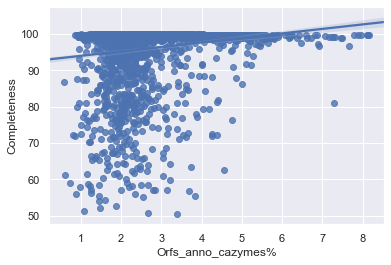

In [30]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(y=dataset["Completeness"], x= dataset["Orfs_anno_cazymes%"], data=dataset)

In [31]:
# Venn diagram: MAG, Origin
# https://www.kaggle.com/rashmibanthia/venn-diagram-for-items

# Geographic Distribution

In [32]:
dataset[["Geographic location","Geographic location (country or region)", "Geographic location (city)"]]

,Geographic location,Geographic location (country or region),Geographic location (city)
0,United Kingdom: England,United Kingdom,England
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Antarctica: Vostok Station,Antarctica,Vostok Station
4,NaN,NaN,NaN
...,...,...,...
2675,NaN,NaN,NaN
2676,NaN,NaN,NaN
2677,NaN,NaN,NaN
2678,NaN,NaN,NaN


In [33]:
dataset["Geographic location"].value_counts()

China                      116
USA:New York City           68
South Korea                 65
USA                         43
Sweden                      39
                          ... 
Denmark: Hullehavn           1
China:Tibetan Plateau        1
Antarctica: Burton Lake      1
China: Xinjiang              1
Japan:Hyogo                  1
Name: Geographic location, Length: 543, dtype: int64

In [34]:
dataset["Geographic location (country or region)"].value_counts()

USA                              326
China                            215
South Korea                      184
Antarctica                        74
Australia                         64
                                ... 
Algeria                            1
Mexico                             1
Germany, Trier                     1
Nabeta Bay, Shimoda, Shizuoka      1
Greece                             1
Name: Geographic location (country or region), Length: 97, dtype: int64

In [35]:
#dataset["Geographic location (country or region)"].plot(kind="bar")
#dataset.plot.bar(x='Geographic location (country or region)')

In [36]:
dataset["Geographic location (city)"].value_counts()

New York City                                                                         68
off the coast of Alicante                                                             23
Crystal Geyser near Green River, Utah                                                 22
North Atlantic Ocean                                                                  17
Kagami River                                                                          17
                                                                                      ..
eastern coast of Jeju Island                                                           1
GD                                                                                     1
the surface of the seashore around a seaweed farm at Geoje Island in the South Sea     1
California, Eel River, South Fork Eel River between Leggett and Piercy                 1
seashore around seaweed farm, Geoje Island, South Sea                                  1
Name: Geographic loca

In [37]:
country = dataset["Geographic location (country or region)"].value_counts()
country.head()

USA            326
China          215
South Korea    184
Antarctica      74
Australia       64
Name: Geographic location (country or region), dtype: int64

[Text(0, 0, 'USA'),
 Text(1, 0, 'China'),
 Text(2, 0, 'South Korea'),
 Text(3, 0, 'Antarctica'),
 Text(4, 0, 'Australia'),
 Text(5, 0, 'Pacific Ocean'),
 Text(6, 0, 'Atlantic Ocean'),
 Text(7, 0, 'Germany'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'United Kingdom'),
 Text(10, 0, 'Sweden'),
 Text(11, 0, 'Canada'),
 Text(12, 0, 'Spain'),
 Text(13, 0, 'Mediterranean Sea'),
 Text(14, 0, 'North Sea'),
 Text(15, 0, 'Indian Ocean'),
 Text(16, 0, 'Taiwan'),
 Text(17, 0, 'Baltic Sea'),
 Text(18, 0, 'Israel'),
 Text(19, 0, 'India'),
 Text(20, 0, 'South Africa'),
 Text(21, 0, 'Slovenia'),
 Text(22, 0, 'Denmark'),
 Text(23, 0, 'France'),
 Text(24, 0, 'Malaysia'),
 Text(25, 0, 'Thailand'),
 Text(26, 0, 'Russia'),
 Text(27, 0, 'Netherlands'),
 Text(28, 0, 'Arctic Ocean'),
 Text(29, 0, 'Norway'),
 Text(30, 0, 'Singapore'),
 Text(31, 0, 'Portugal'),
 Text(32, 0, 'Saudi Arabia'),
 Text(33, 0, 'Hong Kong'),
 Text(34, 0, 'Italy'),
 Text(35, 0, 'Chile')]

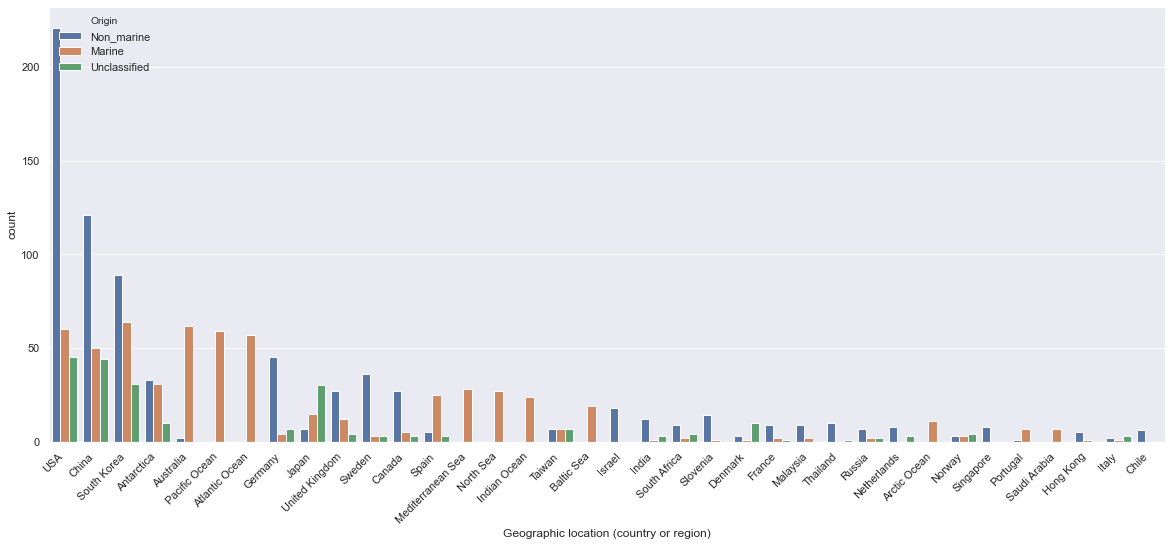

In [38]:
dataset_reduced = dataset.groupby(["Geographic location (country or region)"]).filter(lambda x:x["Geographic location (country or region)"].count()>5)
dataset_reduced.to_csv("Geographic_location.csv")
plt.figure(figsize=(20,8))

g = sns.countplot(x="Geographic location (country or region)", 
                data=dataset_reduced, hue="Origin",
                order = dataset_reduced["Geographic location (country or region)"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [39]:
#sns.set_style("whitegrid")
sns.set_style(style="darkgrid")

[Text(0, 0, 'USA'),
 Text(1, 0, 'China'),
 Text(2, 0, 'South Korea'),
 Text(3, 0, 'Antarctica'),
 Text(4, 0, 'Australia'),
 Text(5, 0, 'Pacific Ocean'),
 Text(6, 0, 'Atlantic Ocean'),
 Text(7, 0, 'Germany'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'United Kingdom'),
 Text(10, 0, 'Sweden'),
 Text(11, 0, 'Canada'),
 Text(12, 0, 'Spain'),
 Text(13, 0, 'Mediterranean Sea'),
 Text(14, 0, 'North Sea'),
 Text(15, 0, 'Indian Ocean'),
 Text(16, 0, 'Taiwan'),
 Text(17, 0, 'Baltic Sea'),
 Text(18, 0, 'Israel'),
 Text(19, 0, 'India'),
 Text(20, 0, 'South Africa'),
 Text(21, 0, 'Slovenia'),
 Text(22, 0, 'Denmark'),
 Text(23, 0, 'France'),
 Text(24, 0, 'Malaysia'),
 Text(25, 0, 'Thailand'),
 Text(26, 0, 'Russia'),
 Text(27, 0, 'Netherlands'),
 Text(28, 0, 'Arctic Ocean'),
 Text(29, 0, 'Norway'),
 Text(30, 0, 'Singapore'),
 Text(31, 0, 'Portugal'),
 Text(32, 0, 'Saudi Arabia'),
 Text(33, 0, 'Hong Kong'),
 Text(34, 0, 'Italy'),
 Text(35, 0, 'Chile')]

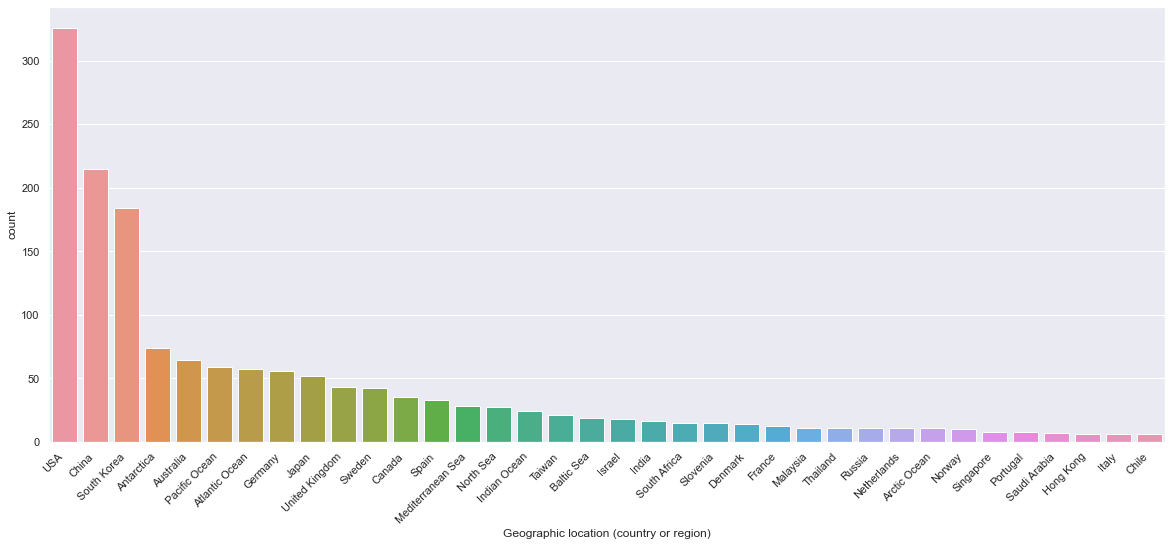

In [40]:
dataset_reduced = dataset.groupby(["Geographic location (country or region)"]).filter(lambda x:x["Geographic location (country or region)"].count()>5)
plt.figure(figsize=(20,8))
g = sns.countplot(x="Geographic location (country or region)", 
                data=dataset_reduced,# hue="Origin",
                order = dataset_reduced["Geographic location (country or region)"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

# Sequencing Platform

In [41]:
dataset["Sequencing platform resumed"].value_counts()

Illumina                            1401
PacBio                               156
Illumina; PacBio                      50
454                                   27
IonTorrent                            15
                                    ... 
Sanger                                 2
ABI 3730; Shimadzu DeNOVA-5500HT       1
Illumina; IonTorrent; 454              1
454; Illumina; Sanger                  1
PacBio; IonTorrent                     1
Name: Sequencing platform resumed, Length: 16, dtype: int64

Text(0, 0.5, 'Count')

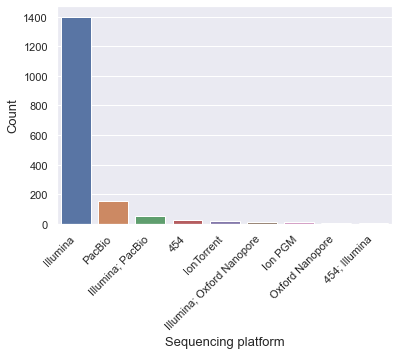

In [42]:
dataset_reduced = dataset.groupby(["Sequencing platform resumed"]).filter(lambda x:x["Sequencing platform resumed"].count()>5)
dataset_reduced.to_csv("Seq.csv")
g = sns.countplot(x="Sequencing platform resumed", 
                data=dataset_reduced, #hue="MAG",
                order = dataset_reduced["Sequencing platform resumed"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Sequencing platform', fontsize=13)
plt.ylabel('Count', fontsize=13)
#plt.title("CAZymes", fontsize=20)

# Host

Text(0, 0.5, 'Count')

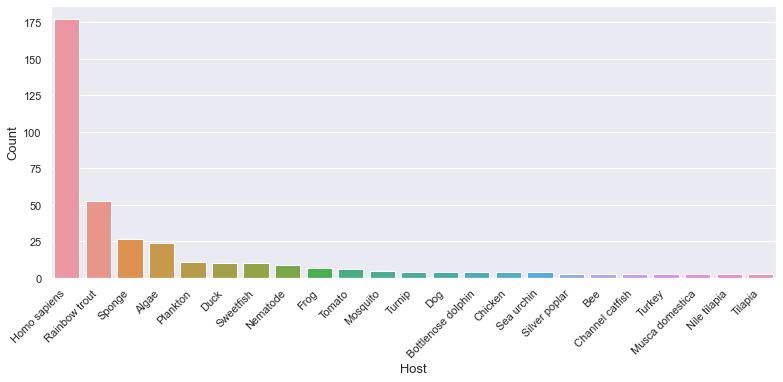

In [43]:
dataset_reduced = dataset.groupby(["Host resumed"]).filter(lambda x:x["Host resumed"].count()>2)
dataset_reduced.to_csv("Host.csv")
plt.figure(figsize=(13,5))
g = sns.countplot(x="Host resumed", 
                data=dataset_reduced, #hue="MAG",
                order = dataset_reduced["Host resumed"].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.xlabel('Host', fontsize=13)
plt.ylabel('Count', fontsize=13)
#plt.title("CAZymes", fontsize=20)

# Diversified plots

In [44]:
df=dataset.groupby('Genus').filter(lambda x : len(x)>7) #remove genus with less than 8 genomes

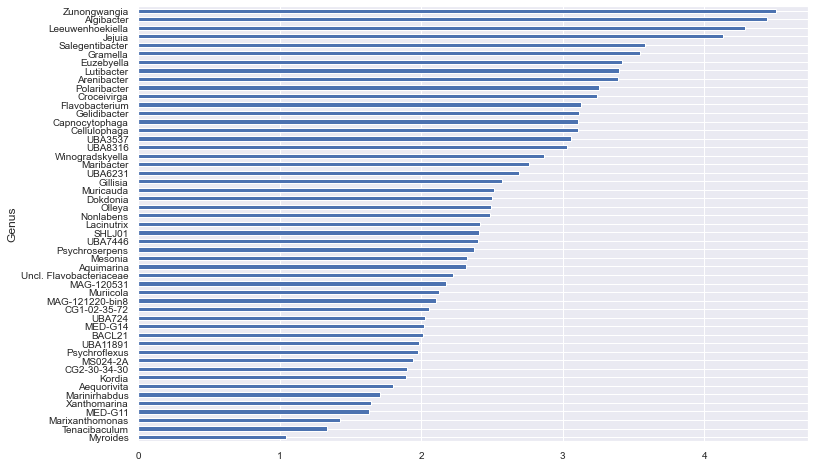

In [45]:
ax = df[df["Family"] == "Flavobacteriaceae"].groupby(["Genus"])["Orfs_anno_cazymes%"].mean().sort_values(ascending=True).plot(kind="barh", figsize=(12, 8), fontsize=10)
ax.set_xlabel=("% Orfs annotated with CAZymes")

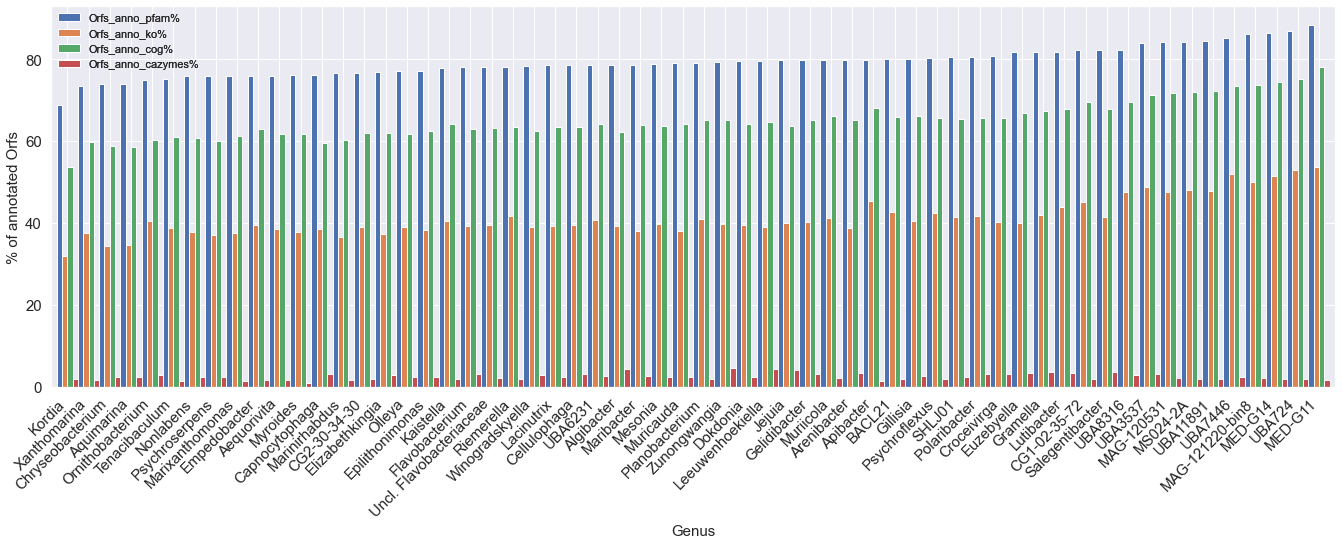

In [46]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="dark")
sns.set_context("paper", font_scale=1.5) 

ax = df.groupby(["Genus"])[["Orfs_anno_pfam%","Orfs_anno_ko%","Orfs_anno_cog%","Orfs_anno_cazymes%"]].mean().sort_values(ascending=True, by="Orfs_anno_pfam%").plot(kind="bar", width=1,figsize=(23,7),fontsize=15, legend=False)
ax.set_xlabel("Genus", fontsize=15)
ax.set_ylabel("% of annotated Orfs", fontsize=15)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

leg1 = plt.legend(loc='upper left',borderaxespad=0.2)
ax.add_artist(leg1)

<AxesSubplot:ylabel='Family,Genus'>

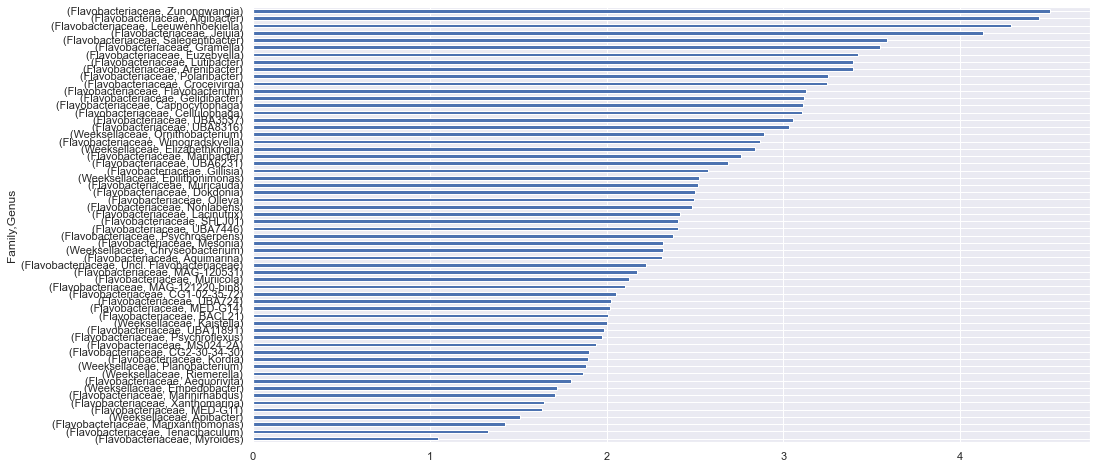

In [47]:
df.groupby(["Family","Genus"])["Orfs_anno_cazymes%"].mean().sort_values(ascending=True).plot(kind="barh", figsize=(15, 8))

## METADATA

In [48]:
metadata.head()

,Assembly accession,ASM name,Alias,Altitude,Anonymized name,Arrayexpress species,Arrayexpress strain or line,Assembly level,Assembly method,Assembly method resumed,Biomaterial provider,Bioproject accession,Biosample accession,Biosample model,Biosample title,Biotic relationship,Body sample site,Cell shape,Collected by,Collection date,Comment paragraph,Completion date,Contact email,Contact lab,Contigs,Country,Culture collection,Depth,Derived from,Description,Disease,ENA checklist,ENA-first-public,ENA-last-update,Elevation,Env biome,Env broad scale,Env feature,Env local scale,Env material,Env medium,Environment,Environmental sample,Estimated size,Excluded from refseq,FDA cvm ID,Finishing strategy (depth of coverage),First name,Ftp path,GOLD stamp ID,Gbrs paired ASM,Genbank accessions,Gene calling method,Genome name,Genome quality flags,Genome rep,Genome status,Genotype,Geographic location,Geographic location (city),Geographic location (country or region),Gram stain,Habitat,Host,Host age,Host disease,Host disease outcome,Host gender,Host health,Host name,Host resumed,Host scientific name,Host sex,Host taxid,Host tissue sampled,INSDC center alias,INSDC center name,INSDC first public,INSDC last update,INSDC status,Identification method,Identified by,Infraspecific name,Investigation type,Isol growth condt,Isolate,Isolation comments,Isolation country,Isolation site,Isolation source,Last name,Latitude,Locus tag prefix,Longitude,MLST,Mapping method and version,Material,Metagenome source,Misc param,Misc param: hmp supersite,Motility,Name,Ncbi taxon ID,Note,Organism,Organism name,Other clinical,Other environmental,Oxygen requirement,Paired ASM comp,Phenotypes,Plasmids,Project name,Project type,Publication,Publication date,Ref biomaterial,Refseq accessions,Refseq category,Refseq cds,Rel to oxygen,Relation to type material,Release type,SRA accession,Salinity,Sample accession,Sample name,Sample type,Seq rel date,Sequencing centers,Sequencing depth,Sequencing method,Sequencing platform,Sequencing platform resumed,Sequencing status,Source mat ID,Species taxid,Specific host,Sporulation,Strain,Strain name alias,Subject ID,Submission model,Submission package,Submitter,Subsrc note,Supplier name,Taxid,Temperature,Temperature optimum,Temperature range,Title,Trophic level,Type material,Type strain,Value,Version status,WGS master,pH,Terrestrial_coordinates,MAG,Origin
0,GCA_000016645.1,ASM1664v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,NaN,PRJNA16082,SAMN02598357,NaN,Sample from Flavobacterium johnsoniae UW101,NaN,NaN,Rod,NaN,NaN,Flavobacterium johnsoniae ATCC 17061. Flavobac...,2007-05-01T00:00:00Z,NaN,NaN,1.0,NaN,ATCC 17061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,GCF_000016645.1,CP000685,NaN,Flavobacterium johnsoniae UW101,NaN,Full,Complete,NaN,United Kingdom: England,England,United Kingdom,NaN,Multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strain=UW101; ATCC 17061,NaN,NaN,NaN,isolated from soil in England and is the type ...,United Kingdom,NaN,soil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NCBI,376686.0,NaN,Flavobacterium johnsoniae UW101,Flavobacterium johnsoniae UW101,NaN,NaN,Aerobic,identical,NaN,NaN,NaN,NaN,NaN,2014-01-28T00:00:00.000,NaN,NC_009441,representative genome,5017.0,NaN,assembly from type material,Major,NaN,Non-halophilic,SAMN02598357,CP000685,NaN,2007/05/01,DOE Joint Genome Institute,NaN,NaN,NaN,NaN,complete,NaN,986.0,NaN,No,ATCC 17061,NaN,NaN,Generic,Generic.1.0,US DOE Joint Genome Institute,NaN,NaN,376686.0,NaN,20-30,Mesophilic,NaN,NaN,type strain of Flavobacterium johnsoniae,Yes,NaN,latest,NaN,NaN,NaN,False,Non_marine
1,GCA_000023285.1,ASM2328v1,NaN,NaN,NaN,NaN,NaN,Complete Genome,NaN,NaN,NaN,PRJNA29403,SAMN00001911,NaN,Generic sample from Capnocytophaga ochracea DS...,NaN,NaN,Rod,NaN,NaN,Capnocytophaga ochracea DSM 7271,2009-04-30T00:00:00Z,NaN,NaN,1.0,NaN,DSM 7271,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [49]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Columns: 162 entries, Assembly accession to Origin
dtypes: bool(1), float64(6), object(155)
memory usage: 3.3+ MB


In [56]:
metadata[metadata["Altitude"].isna() == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2642 entries, 0 to 2679
Columns: 162 entries, Assembly accession to Origin
dtypes: bool(1), float64(6), object(155)
memory usage: 3.3+ MB


In [69]:
s = metadata.notna().mean()*100
s = s.sort_values(ascending=False).round(2)
print(s)

Origin                   100.00
Seq rel date             100.00
Assembly level           100.00
Bioproject accession     100.00
Biosample accession      100.00
                          ...  
Genotype                   0.45
Strain name alias          0.41
Gene calling method        0.41
Host tissue sampled        0.41
Identification method      0.41
Length: 162, dtype: float64


In [85]:
s.mean()

29.028827160493794

In [86]:
s.describe()

count    162.000000
mean      29.028827
std       35.227229
min        0.410000
25%        1.810000
50%        6.735000
75%       63.002500
max      100.000000
dtype: float64

In [81]:
s[s==100]

Origin                  100.0
Seq rel date            100.0
Assembly level          100.0
Bioproject accession    100.0
Biosample accession     100.0
Genome rep              100.0
MAG                     100.0
Assembly accession      100.0
Version status          100.0
dtype: float64

[Text(0, 0, 'Contact email'),
 Text(1, 0, 'First name'),
 Text(2, 0, 'Last name'),
 Text(3, 0, 'Sample type'),
 Text(4, 0, 'Isolation country'),
 Text(5, 0, 'Geographic location (city)'),
 Text(6, 0, 'Isolate'),
 Text(7, 0, 'Excluded from refseq'),
 Text(8, 0, 'Relation to type material'),
 Text(9, 0, 'Longitude'),
 Text(10, 0, 'Latitude'),
 Text(11, 0, 'Terrestrial_coordinates'),
 Text(12, 0, 'Metagenome source'),
 Text(13, 0, 'Environmental sample'),
 Text(14, 0, 'Refseq category'),
 Text(15, 0, 'Type material'),
 Text(16, 0, 'Host'),
 Text(17, 0, 'Host resumed'),
 Text(18, 0, 'Culture collection'),
 Text(19, 0, 'Host name'),
 Text(20, 0, 'Biosample model'),
 Text(21, 0, 'Env biome'),
 Text(22, 0, 'Depth'),
 Text(23, 0, 'Publication'),
 Text(24, 0, 'Mapping method and version'),
 Text(25, 0, 'Note'),
 Text(26, 0, 'Value'),
 Text(27, 0, 'SRA accession'),
 Text(28, 0, 'Collected by'),
 Text(29, 0, 'Other environmental'),
 Text(30, 0, 'Subsrc note'),
 Text(31, 0, 'Isolation comments'),


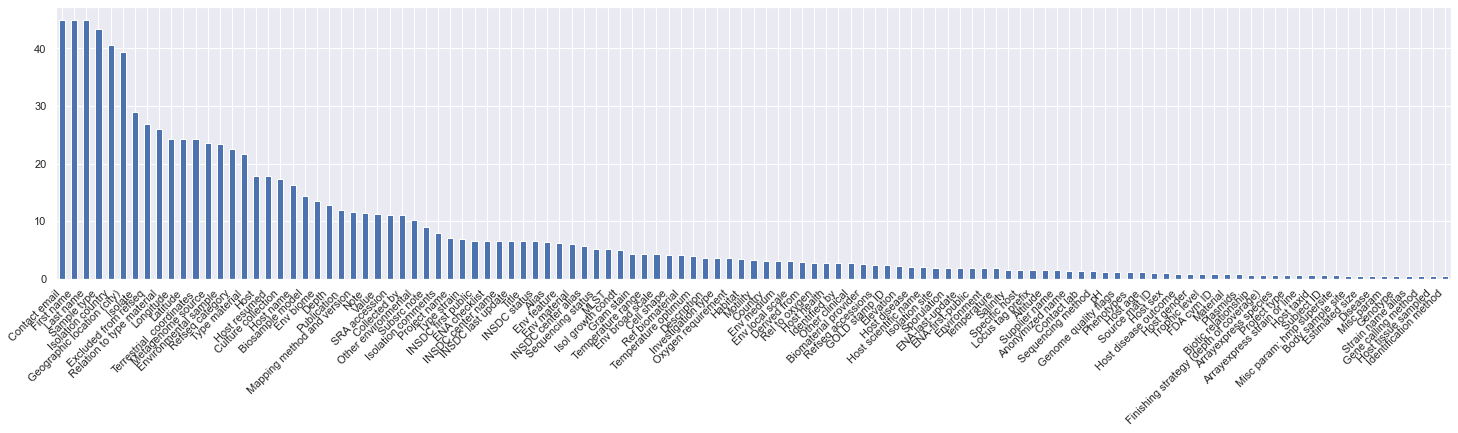

In [84]:
s2 = s[s<50]
ax = s2.plot(kind="bar", figsize=(25,5))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')